# Laboratorio 9: SMOTE y Perceptrón Simple

### Parte I. 

    -Implementa el método de SMOTE, descrito en: 
        https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
    -Prueba tu implementación con el dataset:  Glass
    -Aplica el clasificador Euclidiano y 1NN antes y después de aplicar el SMOTE
    -Valida el desempeño de los clasificadores con 
        1.Hold-Out 
        2.10-Fold Cross-Validation
    -Determina si hubo mejoras en el desempeño de los clasificadores. 


**Nota:**  No se pueden emplear bibliotecas. 



### Parte II.

    -Programar un perceptrón simple que sea capaz de clasificar una versión de la iris plant de dos clases. 
    -Validar con Hold-Out 70/30
    -No se permitirá el uso de bibliotecas para el perceptrón, ni para la validación. 


**Nota:** se recomienda usar las clases setosa y virginica del dataset de la iris. 

**Entrega:**

    1.Reporte de resultados.
    2.Código en repositorio. 





In [28]:
#Recuperados de la práctica 7 

from collections import Counter
import numpy as np

class KNN:
    def __init__(self, k=1):
        self.k = k
        
    def fit(self, X_train, y_train): 
        self.X_train = np.array(X_train, dtype=float)  
        self.y_train = np.array(y_train)               
        
    def predict(self, X_test): 
        X_test = np.array(X_test, dtype=float)
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = [np.sqrt(np.sum((x_train - x) ** 2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def accuracy(self, y_pred, y_test):
        return np.sum(y_pred == y_test) / len(y_test)


class EuclideanClassifier:
    def fit(self, X, y):
        X = np.array(X, dtype=float)
        self.centroids = {}
        for cls in np.unique(y):
            self.centroids[cls] = X[y == cls].mean(axis=0)

    def predict(self, X):
        X = np.array(X, dtype=float)
        predictions = []
        for x in X:
            distances = {cls: np.linalg.norm(x - centroid) for cls, centroid in self.centroids.items()}
            predictions.append(min(distances, key=distances.get))
        return np.array(predictions)

In [17]:
import pandas as pd 
import numpy as np 


data= pd.read_csv("glass.csv")
y= data['Type'] 
X= data.drop(['Type'], axis= 1)
df= pd.DataFrame(data= X , columns= X.columns)
print(df.head())
df.info()
print("Valores Nulos:\n", df.isnull().sum()) #buscamos valores nulos e info

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB
Valores Nulos:
 RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype:

#### Antes de aplicar SMOTE

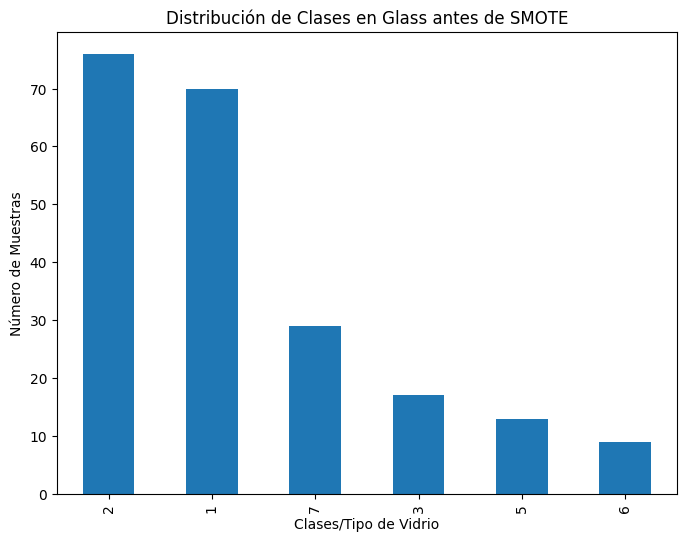

Distribución de clases: 
Type
2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: proportion, dtype: float64


In [18]:
from matplotlib import pyplot as plt 


class_counts = y.value_counts()
# Plotteamos el histograma
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title("Distribución de Clases en Glass antes de SMOTE")
plt.xlabel("Clases/Tipo de Vidrio")
plt.ylabel("Número de Muestras")
plt.show()

print("Distribución de clases: ")
# Distribución de clases en porcentaje
class_distribution = y.value_counts(normalize=True) 
print(class_distribution)



Se puede observar que la distribución de datos no es uniforme y SMOTE es necesario para balancear los datos.

#### Aplicando clasificador Euclidiano y 1NN antes de SMOTE

** Desempeño con 1NN Classifier ** 


Desempeño Hold-Out estratificado 70-30
Accuracy (Hold-Out): 0.7538461538461538


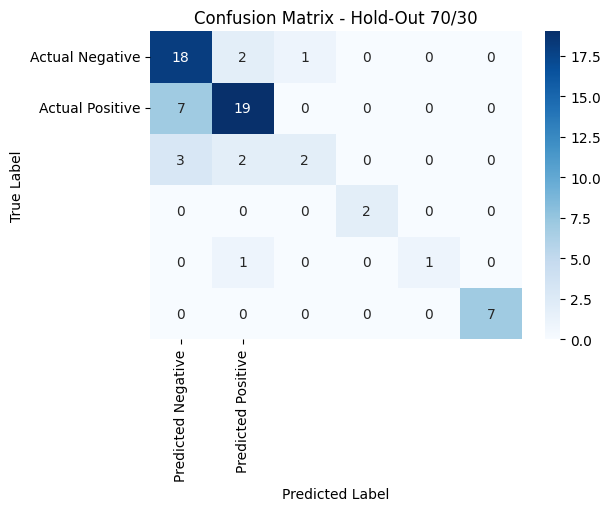

/home/juan/env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Fold 1 Accuracy: 0.7272727272727273
Fold 2 Accuracy: 0.5909090909090909
Fold 3 Accuracy: 0.5454545454545454
Fold 4 Accuracy: 0.8636363636363636
Fold 5 Accuracy: 0.8571428571428571
Fold 6 Accuracy: 0.8095238095238095
Fold 7 Accuracy: 0.7142857142857143
Fold 8 Accuracy: 0.8095238095238095
Fold 9 Accuracy: 0.5714285714285714
Fold 10 Accuracy: 0.5714285714285714
Average Accuracy (Stratified 10-Fold): 0.706060606060606


** Desempeño con Euclidean Classifier **


Desempeño Hold-Out estratificado 70-30
Accuracy (Hold-Out): 0.5230769230769231


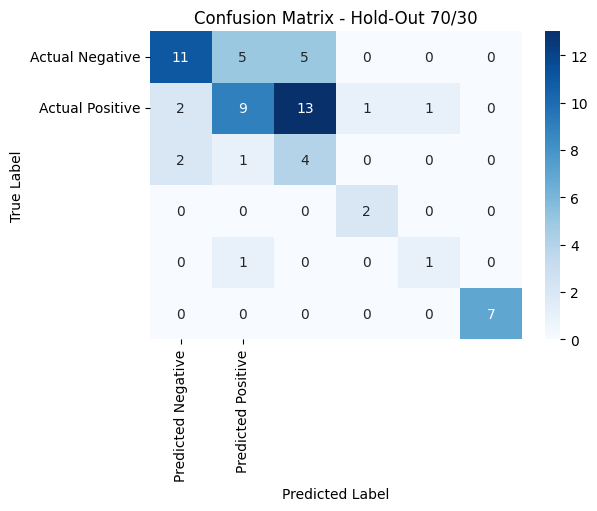

Fold 1 Accuracy: 0.6363636363636364
Fold 2 Accuracy: 0.5909090909090909
Fold 3 Accuracy: 0.5
Fold 4 Accuracy: 0.3181818181818182
Fold 5 Accuracy: 0.5714285714285714
Fold 6 Accuracy: 0.42857142857142855
Fold 7 Accuracy: 0.6190476190476191
Fold 8 Accuracy: 0.47619047619047616
Fold 9 Accuracy: 0.47619047619047616
Fold 10 Accuracy: 0.38095238095238093
Average Accuracy (Stratified 10-Fold): 0.4997835497835498


/home/juan/env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [19]:
from validators import ValidationMethods

# Instancias de los clasificadores
knn = KNN(k=1)
Euclidean = EuclideanClassifier()

# Instancia de ValidationMethods
validation_mtds = ValidationMethods(X, y)


# Evaluación Holdout para knn y Euclidean
print("** Desempeño con 1NN Classifier ** \n\n")
validation_mtds.holdout(knn)
validation_mtds.stratified_k_fold(knn)


print("\n\n** Desempeño con Euclidean Classifier **\n\n")
validation_mtds.holdout(Euclidean)
validation_mtds.stratified_k_fold(Euclidean)


#### Después de aplicar SMOTE

**Según el artículo:** https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Aplicar SMOTE 
smt = SMOTE(random_state=42)
X_train_sm, y_train_sm = smt.fit_resample(X, y)


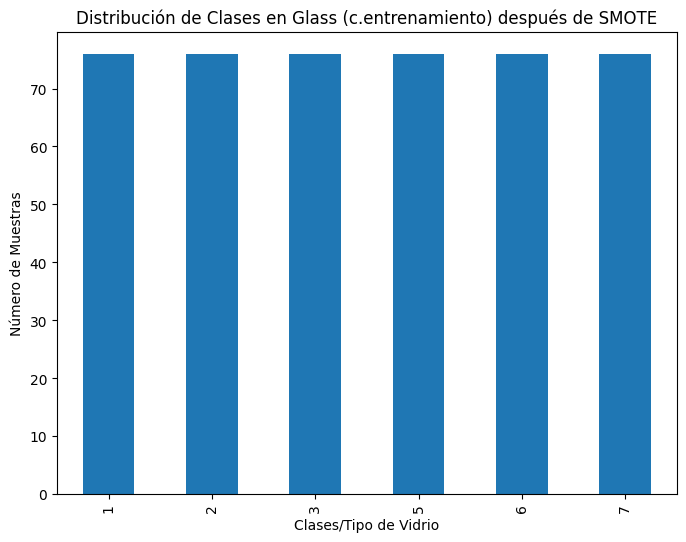

Class Distribution: 
Type
1    0.166667
2    0.166667
3    0.166667
5    0.166667
6    0.166667
7    0.166667
Name: proportion, dtype: float64


In [21]:
from matplotlib import pyplot as plt 

class_counts = y_train_sm.value_counts()
# Plotteamos el histograma
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title("Distribución de Clases en Glass (c.entrenamiento) después de SMOTE")
plt.xlabel("Clases/Tipo de Vidrio")
plt.ylabel("Número de Muestras")
plt.show()

print("Class Distribution: ")

# Distribución de clases en porcentaje
class_distribution = y_train_sm.value_counts(normalize=True) 
print(class_distribution)

#### Aplicando clasificador Euclidiano y 1NN después de SMOTE

** Desempeño con 1NN Classifier ** 


Desempeño Hold-Out estratificado 70-30
Accuracy (Hold-Out): 0.8686131386861314


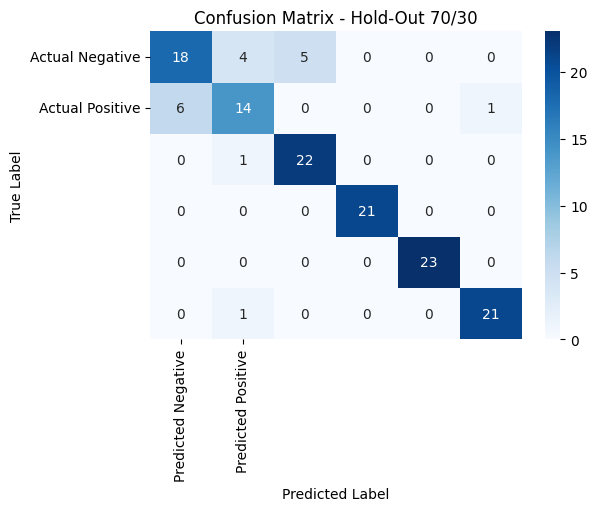

Fold 1 Accuracy: 0.9130434782608695
Fold 2 Accuracy: 0.8913043478260869
Fold 3 Accuracy: 0.8695652173913043
Fold 4 Accuracy: 0.9347826086956522
Fold 5 Accuracy: 0.8478260869565217
Fold 6 Accuracy: 0.9565217391304348
Fold 7 Accuracy: 0.8888888888888888
Fold 8 Accuracy: 0.8666666666666667
Fold 9 Accuracy: 0.9111111111111111
Fold 10 Accuracy: 0.9111111111111111
Average Accuracy (Stratified 10-Fold): 0.8990821256038648


** Desempeño con Euclidean Classifier **


Desempeño Hold-Out estratificado 70-30
Accuracy (Hold-Out): 0.6642335766423357


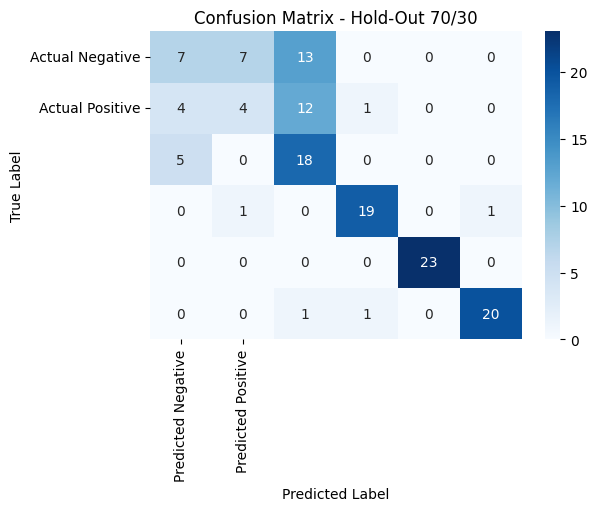

Fold 1 Accuracy: 0.717391304347826
Fold 2 Accuracy: 0.717391304347826
Fold 3 Accuracy: 0.6521739130434783
Fold 4 Accuracy: 0.717391304347826
Fold 5 Accuracy: 0.6739130434782609
Fold 6 Accuracy: 0.717391304347826
Fold 7 Accuracy: 0.7111111111111111
Fold 8 Accuracy: 0.6666666666666666
Fold 9 Accuracy: 0.7555555555555555
Fold 10 Accuracy: 0.6222222222222222
Average Accuracy (Stratified 10-Fold): 0.6951207729468599


In [22]:
from validators import ValidationMethods

# Instancias de los clasificadores
knn = KNN(k=1)
Euclidean = EuclideanClassifier()

# Instancia de ValidationMethods
validation_mtds = ValidationMethods(X_train_sm, y_train_sm)


# Evaluación Holdout para knn y Euclidean
print("** Desempeño con 1NN Classifier ** \n\n")
validation_mtds.holdout(knn)
validation_mtds.stratified_k_fold(knn)


print("\n\n** Desempeño con Euclidean Classifier **\n\n")
validation_mtds.holdout(Euclidean)
validation_mtds.stratified_k_fold(Euclidean)

Se puede observar que aumentó el rendimiento tanto en 1NN como en el modelo Euclidiano. 


Para el modelo 1NN antes de aplicar SMOTE se alcanzó un accuracy de 0.75 y de 0.706 para Hold out y 10 Fold cross validation promedio respectivamente, 
en contraste con SMOTE, se observaron resultados de accuracy **0.86** y **0.89** respectivamente. 

Para el clasificador Euclidiano antes de aplicar SMOTE se alcanzó un accuracy de 0.52 y de 0.49 para Hold out y 10 Fold cross validation promedio respectivamente, 
en contraste con SMOTE, se observaron resultados de accuracy **0.664** y **0.695** respectivamente.

Lo que prueba que SMOTE es una técnica escencial para reducir el oversampling y mejorar el rendimiento de los clasificadores sin perder la escencia de la información. 


### Parte II 

#### Implementación de Perceptrón

In [23]:
import numpy as np
import random

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.random.uniform(-1, 1, input_size)  # inicializar pesos aleatoriamente
        self.bias = random.uniform(-1, 1)  # inicializar el sesgo aleatoriamente
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        # Función de activación (paso binario)
        return 1 if x >= 0 else -1

    def train(self, X, y):
        # Entrenamiento del perceptrón
        for epoch in range(self.epochs):
            for i in range(len(X)):
                x = X[i]
                y_true = y[i]
                # Calcular la salida del perceptrón
                y_pred = self.activation(np.dot(self.weights, x) + self.bias)
                # Ajuste de pesos y sesgo si hay error
                if y_true != y_pred:
                    self.weights += self.learning_rate * (y_true - y_pred) * x
                    self.bias += self.learning_rate * (y_true - y_pred)

    def predict(self, x):
        # Predicción para una entrada
        return self.activation(np.dot(self.weights, x) + self.bias)


#### Carga de Iris Dataset para clases Setosa y Virgínica

In [30]:
from sklearn import datasets
import numpy as np
import random

# Cargar el dataset de Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Filtrar solo Setosa (clase 0) y Virginica (clase 2)
X = X[(y == 0) | (y == 2)]
y = y[(y == 0) | (y == 2)]

# Convertir etiquetas: Setosa = 1, Virginica = -1
y = np.where(y == 0, 1, -1)


#### Aplicando el modelo y validando con Hold Out

In [31]:

# Mezclar los datos para la división de hold-out
indices = np.arange(len(X))
np.random.shuffle(indices)
X, y = X[indices], y[indices]

# Dividir en conjuntos de entrenamiento y prueba (70/30)
split_index = int(len(X) * 0.7)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Crear y entrenar el modelo
perceptron = Perceptron(input_size=X.shape[1], learning_rate=0.1, epochs=100)
perceptron.train(X_train, y_train)

# Validación en el conjunto de prueba
correct_predictions = 0
for i in range(len(X_test)):
    prediction = perceptron.predict(X_test[i])
    if prediction == y_test[i]:
        correct_predictions += 1

# Calcular y mostrar la accuracy
accuracy = correct_predictions / len(X_test)
print("Accuracy perceptron:", accuracy)



Accuracy perceptron: 1.0
